In [2]:
!wget -O student-mat.csv https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-mat.csv

--2020-05-17 20:34:08--  https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-mat.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56993 (56K) [text/plain]
Saving to: ‘student-mat.csv’

student-mat.csv     100%[===================>]  55.66K  --.-KB/s    in 0.03s   

2020-05-17 20:34:08 (2.11 MB/s) - ‘student-mat.csv’ saved [56993/56993]



In [0]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("student-mat.csv", sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [16]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [17]:
df.shape

(395, 33)

In [18]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

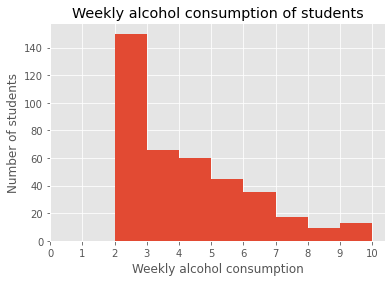

In [22]:
df['Weekly_Alcohol'] = df['Dalc'] + df['Walc']

plt.hist(df['Weekly_Alcohol'], bins=8)
plt.title('Weekly alcohol consumption of students')
plt.xlabel('Weekly alcohol consumption')
plt.ylabel('Number of students')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.show()

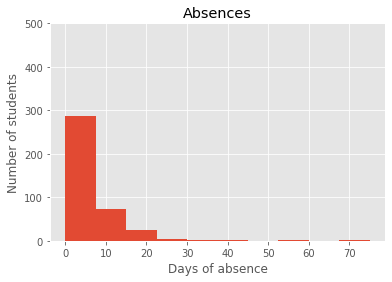

In [20]:
plt.hist(df['absences'])
plt.title('Absences')
plt.xlabel('Days of absence')
plt.ylabel('Number of students')
plt.yticks([0, 100, 200, 300, 400, 500])
plt.show()

In [23]:
Avg_Absence = np.average(df['absences'])
print(round(Avg_Absence, 2))

5.71


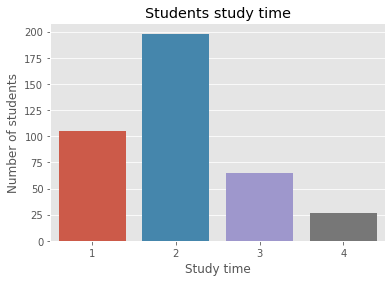

In [26]:
sns.countplot(df.studytime)
plt.title("Students study time")
plt.xlabel("Study time")
plt.ylabel("Number of students")
plt.show()

Text(0.5, 1.0, 'gender')

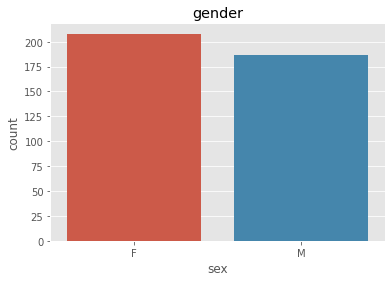

In [27]:
sns.countplot(df.sex)
plt.title("gender")

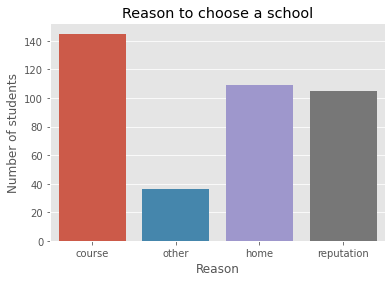

In [29]:
sns.countplot(df.reason)
plt.title("Reason to choose a school")
plt.xlabel("Reason")
plt.ylabel("Number of students")
plt.show()

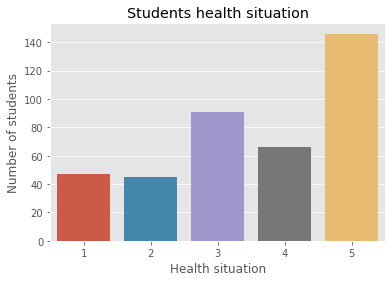

In [31]:
sns.countplot(df.health)
plt.title("Students health situation")
plt.xlabel("Health situation")
plt.ylabel("Number of students")
plt.show()


In [10]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use("ggplot")

# Import dataset with student's data
data = pd.read_csv("student-mat.csv", sep=";")

# Select the value we want to predict
predict = "G3"

# List the variables we want to use for our predictions in this model
data = data[[ "G1", "G2", "G3", "studytime", "health", "famrel", "failures", "absences"]]
data = shuffle(data)

x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

# Train model multiple times to find the highest accuracy
best = 0
for _ in range(200):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)


Accuracy: 0.87187645480413
Accuracy: 0.9164650006795023
Accuracy: 0.9157418384194894
Accuracy: 0.7951979243505589
Accuracy: 0.9327062311688209
Accuracy: 0.9355084943368279
Accuracy: 0.763998611793545
Accuracy: 0.8136334861287919
Accuracy: 0.8359534820358119
Accuracy: 0.9358046984538306
Accuracy: 0.7067400950376734
Accuracy: 0.835460969172801
Accuracy: 0.8228968726168173
Accuracy: 0.8473868171960938
Accuracy: 0.6917268367227456
Accuracy: 0.9087436714804815
Accuracy: 0.8263511794505023
Accuracy: 0.9085419478266444
Accuracy: 0.8482762081229119
Accuracy: 0.7952849661433073
Accuracy: 0.8067725492329798
Accuracy: 0.7814738793327856
Accuracy: 0.7908470777062103
Accuracy: 0.8220873564053158
Accuracy: 0.8755223000281038
Accuracy: 0.8869630166716364
Accuracy: 0.9078490480207929
Accuracy: 0.9421007783923708
Accuracy: 0.8651974135516043
Accuracy: 0.8704659902557792
Accuracy: 0.7554936032185695
Accuracy: 0.808394072811513
Accuracy: 0.7166758788064036
Accuracy: 0.7441466063189406
Accuracy: 0.6030660

In [11]:
print("Highest Accuracy:", best)

Highest Accuracy: 0.9473182130423269


In [37]:
# Load model
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

print("-------------------------")
print('Coefficient: \n', linear.coef_)
print("-------------------------")
print('Intercept: \n', linear.intercept_)
print("-------------------------")
predictions = linear.predict(x_test)

-------------------------
Coefficient: 
 [ 0.15026683  0.99243826 -0.20504611  0.08065926  0.36727826 -0.29841932
  0.03839774]
-------------------------
Intercept: 
 -3.3395073131961137
-------------------------


In [36]:
# Print the predictions, the variables we used and the actual final grade
for x in range(len(predictions)):
    print("Predicted Final grade:", predictions[x], "\t Data:", x_test[x], "\t \t \tFinal grade:", y_test[x])


Predicted Final grade: 7.70698382863389 	 Data: [10  8  2  2  4  0 10] 	 	 	Final grade: 8
Predicted Final grade: 6.783700636898464 	 Data: [ 7  7  1  4  4  0 14] 	 	 	Final grade: 5
Predicted Final grade: 7.270097992591333 	 Data: [ 9  8  2  3  3  0 10] 	 	 	Final grade: 8
Predicted Final grade: 10.72921417477863 	 Data: [13 11  2  4  4  1  3] 	 	 	Final grade: 11
Predicted Final grade: 10.619094517900542 	 Data: [10 11  2  5  4  0  2] 	 	 	Final grade: 11
Predicted Final grade: 4.19588598761053 	 Data: [5 5 2 3 5 0 4] 	 	 	Final grade: 6
Predicted Final grade: 15.340181734886785 	 Data: [15 15  2  5  4  0  2] 	 	 	Final grade: 14
Predicted Final grade: 13.398493115322436 	 Data: [14 13  1  2  4  0  8] 	 	 	Final grade: 13
Predicted Final grade: 10.993099544856596 	 Data: [13 11  2  5  4  0  0] 	 	 	Final grade: 10
Predicted Final grade: 20.405991340128374 	 Data: [18 19  1  4  5  0  6] 	 	 	Final grade: 19
Predicted Final grade: 10.171156994548332 	 Data: [10 11  2  4  3  0  2] 	 	 	

No handles with labels found to put in legend.


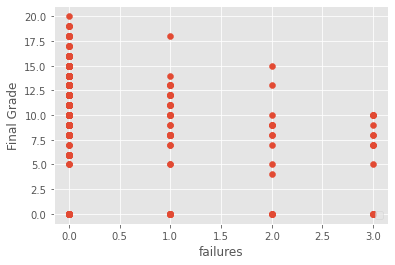

In [14]:
# Create visualisation of the model
plot = "failures"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()